In [1]:
import random

import cv2
import numpy as np
from matplotlib import pyplot as plt

import gorillatracker.cvat_import as cvat_import
from gorillatracker.sam_model import show_sam_box, show_sam_mask


def show_yolo_box(image_path, bbox_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    with open(bbox_path, "r") as file:
        bboxes = file.readlines()
    
    for bbox in bboxes:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, bbox.split())
        x_min = int((x_center - bbox_width / 2) * width)
        y_min = int((y_center - bbox_height / 2) * height)
        x_max = int((x_center + bbox_width / 2) * width)
        y_max = int((y_center + bbox_height / 2) * height)

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

/opt/conda/envs/research/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base_path = "/workspaces/gorillatracker/data/ground_truth/cxl"
cvat_path = f"{base_path}/full_images_body_instance_segmentation/cvat_export.xml"
img_path = f"{base_path}/full_images/"
segmented_gorilla_images = cvat_import.cvat_import(cvat_path, img_path)

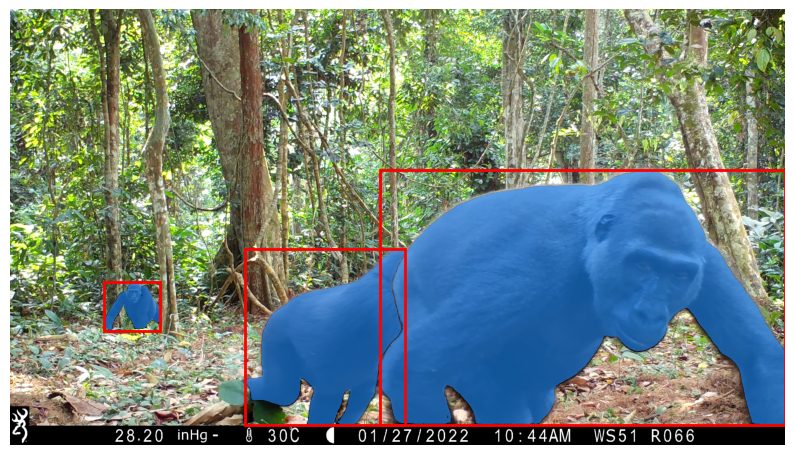

In [3]:
segmented_gorilla_image = random.choice(segmented_gorilla_images) 

gorilla_image = cv2.imread(segmented_gorilla_image.path)
gorilla_image = cv2.cvtColor(gorilla_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(gorilla_image)
plt.axis("off")
for class_label, segments in segmented_gorilla_image.segments.items():
    for mask, box in segments:
        show_sam_box(box, plt.gca())
        show_sam_mask(mask, plt.gca())
plt.show()

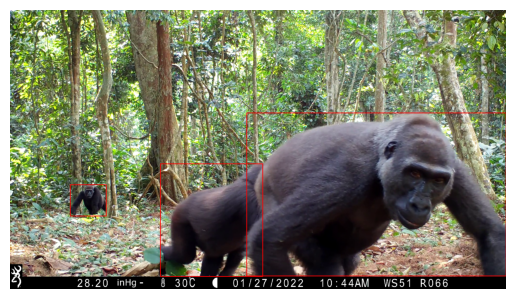

In [4]:
filename = segmented_gorilla_image.path.split("/")[-1].split(".")[0]
bbox_path = f"{base_path}/full_images_body_bbox/{filename}.txt"
show_yolo_box(segmented_gorilla_image.path, bbox_path)

torch.Size([1, 1080, 1920])


torch.Size([1, 1080, 1920])
torch.Size([1, 1080, 1920])


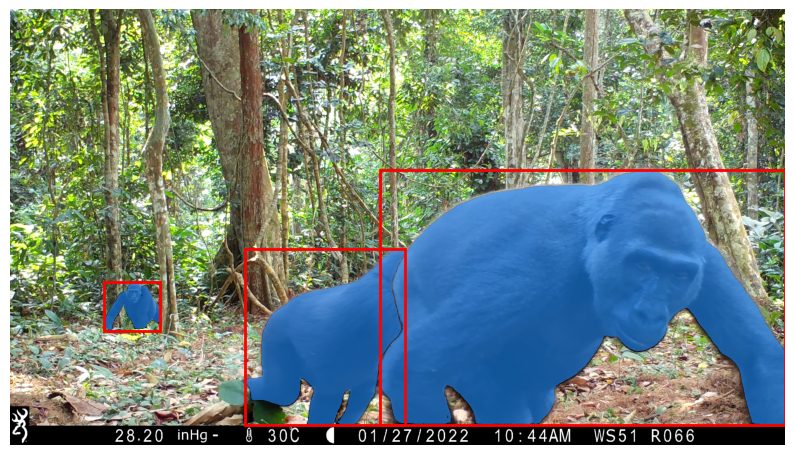

In [5]:
import torch

def _convert_to_binary_mask(ground_truth_mask):
    print(ground_truth_mask.shape)
    # ground_truth_mask is expected to be of shape [batch_size, height, width]
    gt_mask_resized = ground_truth_mask.view(
        ground_truth_mask.shape[0], 1, ground_truth_mask.shape[1], ground_truth_mask.shape[2]
    )
    gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32)
    return gt_binary_mask


plt.figure(figsize=(10,10))
plt.imshow(gorilla_image)
plt.axis("off")
for class_label, segments in segmented_gorilla_image.segments.items():
    for mask, box in segments:
        show_sam_box(box, plt.gca())
        torch_mask = torch.from_numpy(mask)
        torch_mask = torch_mask.unsqueeze(0)
        show_sam_mask(_convert_to_binary_mask(torch_mask), plt.gca())
plt.show()